# Index

1. [Packages](#packages)
2. [Data exploration](#data-exploration)
3. [Plots](#plots)
   
   3.1. [Correlation matrix](#correlation-matrix)

   3.2. [TOP CORRELATIONS BAR CHART](#top-correlations-bar-chart)

   3.3. [FRAUD DISTRIBUTION](#fraud-distribution) 

    3.3.0. [BOXPLOTS BY FRAUD STATUS](#boxplots-by-fraud-status)

    3.3.1. [FRAUD RATE BY CATEGORICAL VARIABLES](#fraud-rate-by-categorical-variables)

    3.3.2. [TIME-BASED ANALYSIS](#time-based-analysis)

    3.3.3. [DISTRIBUTION OF KEY VARIABLES](#distribution-of-key-variables)

4. [Outliers](#outliers)
5. [Dashboard](#dashboard)

# Packages

In [ ]:
import sys
import os
from pathlib import Path
sys.path.append(os.path.abspath(".."))

from mlparadetectarfraudes.data import data
from 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pointbiserialr, chi2_contingency




# Data exploration

In [1]:
figures_path = Path('../reports/figures/')
figures_path.mkdir(parents=True, exist_ok=True)

NameError: name 'Path' is not defined

In [ ]:
data
data.sort_values(["transaction_datetime"], ascending=False)

,transaction_datetime,amount,user_age,user_income,device_type,os_type,browser,country,city_size,num_products,...,transaction_day,transaction_month,is_night,is_weekend,is_fraud,amount_to_income_ratio,avg_product_price,high_value_transaction,new_customer,unusual_device_combo
48372,2023-12-30,67.809160,62,74577,tablet,iOS,Chrome,ARS,Suburban,2,...,5,12,1,1,0,0.010911,33.904580,0,0,0
47241,2023-12-30,196.518864,42,51686,mobile,Android,Firefox,BR,Metro,1,...,5,12,1,1,0,0.045626,196.518864,0,0,0
8781,2023-12-30,93.974786,59,50966,mobile,iOS,Chrome,US,Metro,3,...,5,12,1,1,0,0.022126,31.324929,0,0,0
37436,2023-12-30,71.402972,18,64386,desktop,Android,Chrome,BR,Metro,2,...,5,12,1,1,0,0.013308,35.701486,0,0,0
5880,2023-12-30,62.040551,74,63092,desktop,Windows,Safari,UK,Metro,3,...,5,12,1,1,0,0.011800,20.680184,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44246,2023-01-01,337.298650,35,39723,mobile,Windows,Edge,US,Suburban,2,...,6,1,1,1,0,0.101895,168.649325,0,0,1
23071,2023-01-01,72.158779,51,26936,mobile,Android,Firefox,MX,Metro,4,...,6,1,1,1,0,0.032147,18.039695,0,0,0
37578,2023-01-01,9.594605,18,54644,mobile,Windows,Safari,UK,Urban,2,...,6,1,1,1,0,0.002107,4.797303,0,0,1
8476,2023-01-01,93.481461,31,42431,mobile,MacOS,Firefox,UK,Urban,2,...,6,1,1,1,0,0.026438,46.740730,0,0,0


In [ ]:

#Antes de analizar lo principales estadísticos, verifiquemos si tenemos como estructura de dato un dataframe!
type(data)
#Conocer informacion basica
print('Cantidad de Filas y columnas:',data.shape)
print('Nombre columnas:',data.columns)

#Columnas, nulos y tipos de datos
data.info()
data.dtypes
# Checked how many missing (null) values there are in each variable.
data.isnull().sum()
# cantidad de unicos
len(data.nunique())
#estadisticas basicas de feature numerica
print(data.describe().round(2).T)
# Sumar todos los valores de la columna 'is_fraud'
suma_total_fraudes = data['is_fraud'].sum()
# Agrupar por país y sumar el número de fraudes en cada pais
fraude_x_pais = data.groupby(['country']).agg({'is_fraud': 'sum'}).reset_index()
# Utiliza el método rename para cambiar el nombre de la columna
data.rename(columns={'user_age': 'user_age'}, inplace=True)


Cantidad de Filas y columnas: (50000, 25)
Nombre columnas: Index(['transaction_datetime', 'amount', 'user_age', 'user_income',
       'device_type', 'os_type', 'browser', 'country', 'city_size',
       'num_products', 'repeat_customer', 'account_age_days',
       'previous_chargebacks', 'is_dead_user', 'transaction_hour',
       'transaction_day', 'transaction_month', 'is_night', 'is_weekend',
       'is_fraud', 'amount_to_income_ratio', 'avg_product_price',
       'high_value_transaction', 'new_customer', 'unusual_device_combo'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_datetime    50000 non-null  datetime64[ns]
 1   amount                  50000 non-null  float64       
 2   user_age                50000 non-null  int32         
 3   user_income             500

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_datetime    50000 non-null  datetime64[ns]
 1   amount                  50000 non-null  float64       
 2   user_age                50000 non-null  int32         
 3   user_income             50000 non-null  int64         
 4   device_type             50000 non-null  object        
 5   os_type                 50000 non-null  object        
 6   browser                 50000 non-null  object        
 7   country                 50000 non-null  object        
 8   city_size               50000 non-null  object        
 9   num_products            50000 non-null  int32         
 10  repeat_customer         50000 non-null  int64         
 11  account_age_days        50000 non-null  int32         
 12  previous_chargebacks    50000 non-null  int32 

In [ ]:
transac_mas_altas_UK = datos[(datos['amount'] > 1000) & (datos['country']== 'UK')]

# Plots

In [ ]:
# Create directory if it doesn't exist
figures_path = Path('../reports/figures/')
figures_path.mkdir(parents=True, exist_ok=True)

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# 1. SEPARATE VARIABLE TYPES
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
binary_cols = [col for col in numeric_cols if data[col].nunique() == 2 and col != 'is_fraud']
numeric_cols = [col for col in numeric_cols if col not in ['transaction_datetime']]

## Correlation matrix

In [ ]:
# Cargar tus datos (ya los tienes generados)
df = data.copy()

figures_path = Path('../reports/figures/')
figures_path.mkdir(parents=True, exist_ok=True)


from mlparadetectarfraudes.visualization import calculate_correlations

# Calcular y visualizar correlaciones
correlations = calculate_correlations(df)
plt.figure(figsize=(12, 8))
correlations.plot(kind='barh')
plt.title('Correlación de características con is_fraud', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.xlabel('Correlación')
plt.tight_layout()
plt.savefig(figures_path / 'correlation.png', dpi=300, bbox_inches='tight')
plt.show()

## TOP CORRELATIONS BAR CHART

In [ ]:
#. TOP CORRELATIONS BAR CHART
plt.figure(figsize=(12, 8))
top_vars = corr_results.head(10)
colors = ['red' if x < 0 else 'blue' for x in top_vars['correlation']]

plt.barh(top_vars['variable'], top_vars['correlation'], color=colors)
plt.xlabel('Correlation Coefficient')
plt.title('Top Variables Correlated with Fraud')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.savefig(figures_path / 'top_correlations.png', dpi=300, bbox_inches='tight')
plt.savefig(figures_path / 'top_correlations.pdf', bbox_inches='tight')
plt.show()

## FRAUD DISTRIBUTION

In [ ]:
# Ver distribución de la variable objetivo
print("Distribución de fraudes:")
print(df['is_fraud'].value_counts())
print(f"Porcentaje de fraudes: {df['is_fraud'].mean()*100:.2f}%")

#. FRAUD DISTRIBUTION
plt.figure(figsize=(10, 6))
ax = data['is_fraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Fraud Distribution (Class Imbalance Check)')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Annotate each bar with its value
for i, v in enumerate(data['is_fraud'].value_counts()):
    ax.text(i, v + max(data['is_fraud'].value_counts()) * 0.01, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.savefig(figures_path / 'fraud_distribution.png', dpi=300, bbox_inches='tight')
plt.savefig(figures_path / 'fraud_distribution.pdf', bbox_inches='tight')
plt.show()

### BOXPLOTS BY FRAUD STATUS

In [ ]:
#. BOXPLOTS BY FRAUD STATUS
true_numeric = [col for col in numeric_cols if col not in binary_cols + ['is_fraud']]
n_cols = 4
n_rows = (len(true_numeric) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(true_numeric):
    data.boxplot(column=col, by='is_fraud', ax=axes[i])
    axes[i].set_title(f'{col} by Fraud Status')
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Numerical Variables by Fraud Status', fontsize=16)
plt.tight_layout()
plt.savefig(figures_path / 'boxplots_by_fraud.png', dpi=300, bbox_inches='tight')
plt.savefig(figures_path / 'boxplots_by_fraud.pdf', bbox_inches='tight')
plt.show()

### FRAUD RATE BY CATEGORICAL VARIABLES

In [ ]:
#. FRAUD RATE BY CATEGORICAL VARIABLES
categorical_cols = ['device_type', 'os_type', 'browser', 'country', 'city_size']
n_cats = len(categorical_cols)
n_cols = 2
n_rows = (n_cats + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    fraud_rates = data.groupby(col)['is_fraud'].mean().sort_values(ascending=False).head(8)
    fraud_rates.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Fraud Rate by {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Fraud Rate')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(figures_path / 'fraud_rate_categorical.png', dpi=300, bbox_inches='tight')
plt.savefig(figures_path / 'fraud_rate_categorical.pdf', bbox_inches='tight')
plt.show()

### TIME-BASED ANALYSIS

c:\Users\agust\miniconda3\envs\mlparadetectarfraudes\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\agust\miniconda3\envs\mlparadetectarfraudes\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation with fraud target:
                  variable  correlation  abs_correlation
6     previous_chargebacks     0.083485         0.083485
7             is_dead_user     0.077730         0.077730
15  high_value_transaction     0.041090         0.041090
0                   amount     0.040803         0.040803
14       avg_product_price     0.037606         0.037606
13  amount_to_income_ratio     0.027685         0.027685
5         account_age_days     0.010846         0.010846
12              is_weekend     0.003965         0.003965
17    unusual_device_combo     0.002311         0.002311
2              user_income    -0.002011         0.002011
1                 user_age     0.001981         0.001981
10       transaction_month     0.001125         0.001125
3             num_products    -0.000856         0.000856
4          repeat_customer    -0.000652         0.000652
9          transaction_day     0.000564         0.000564


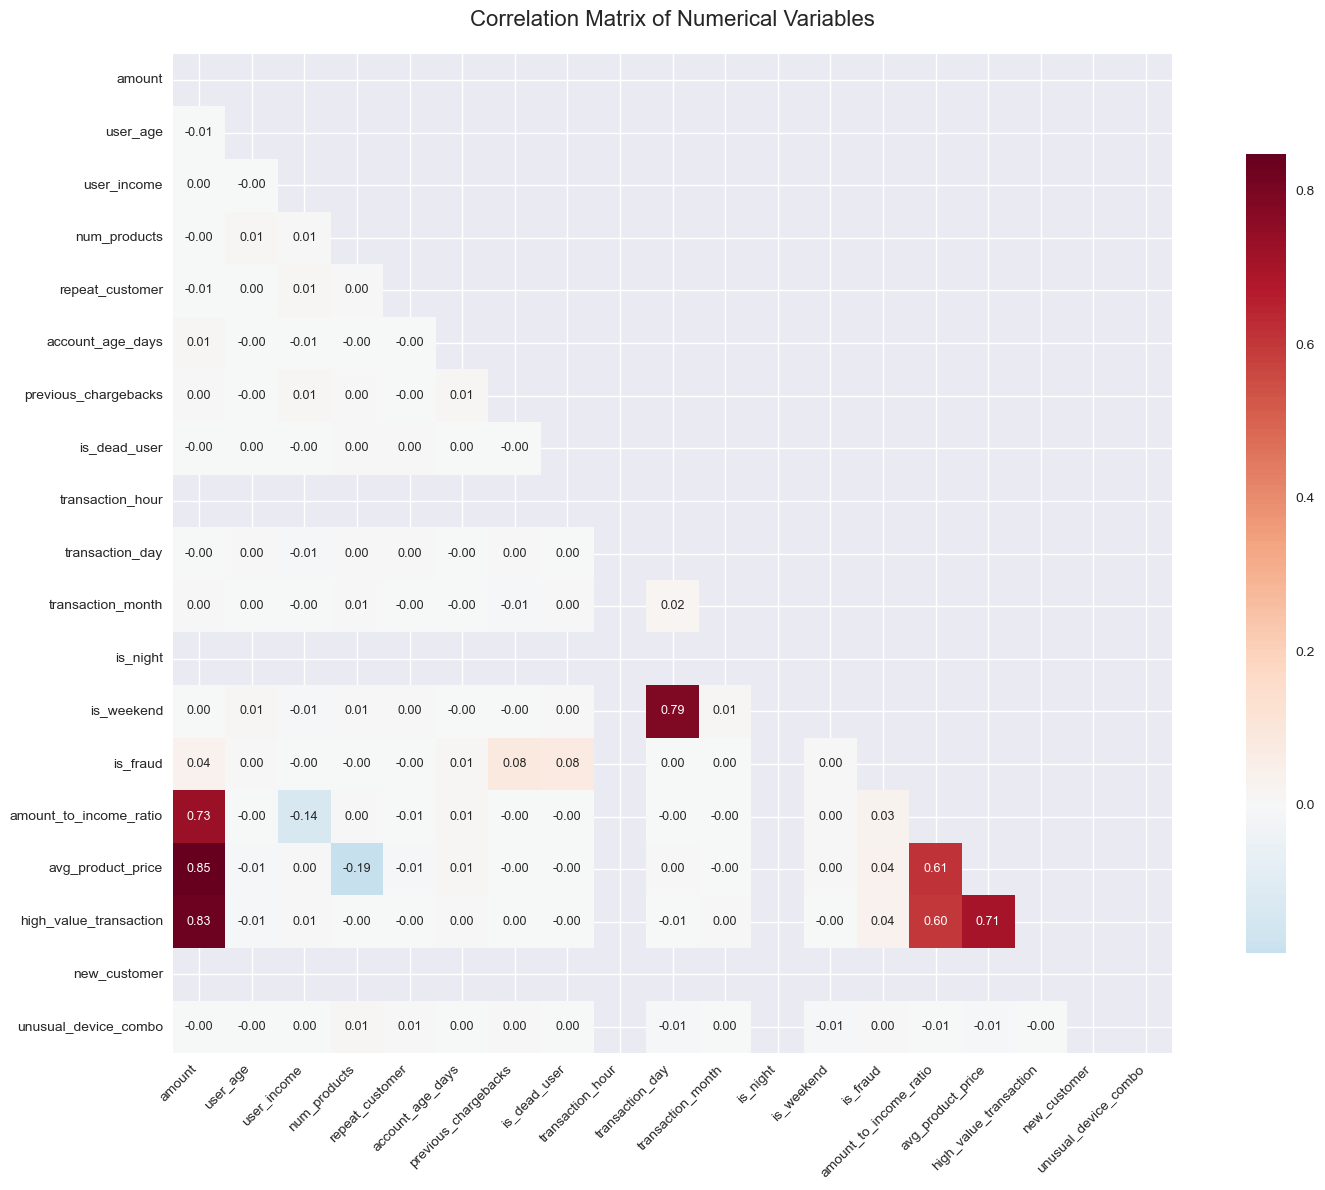

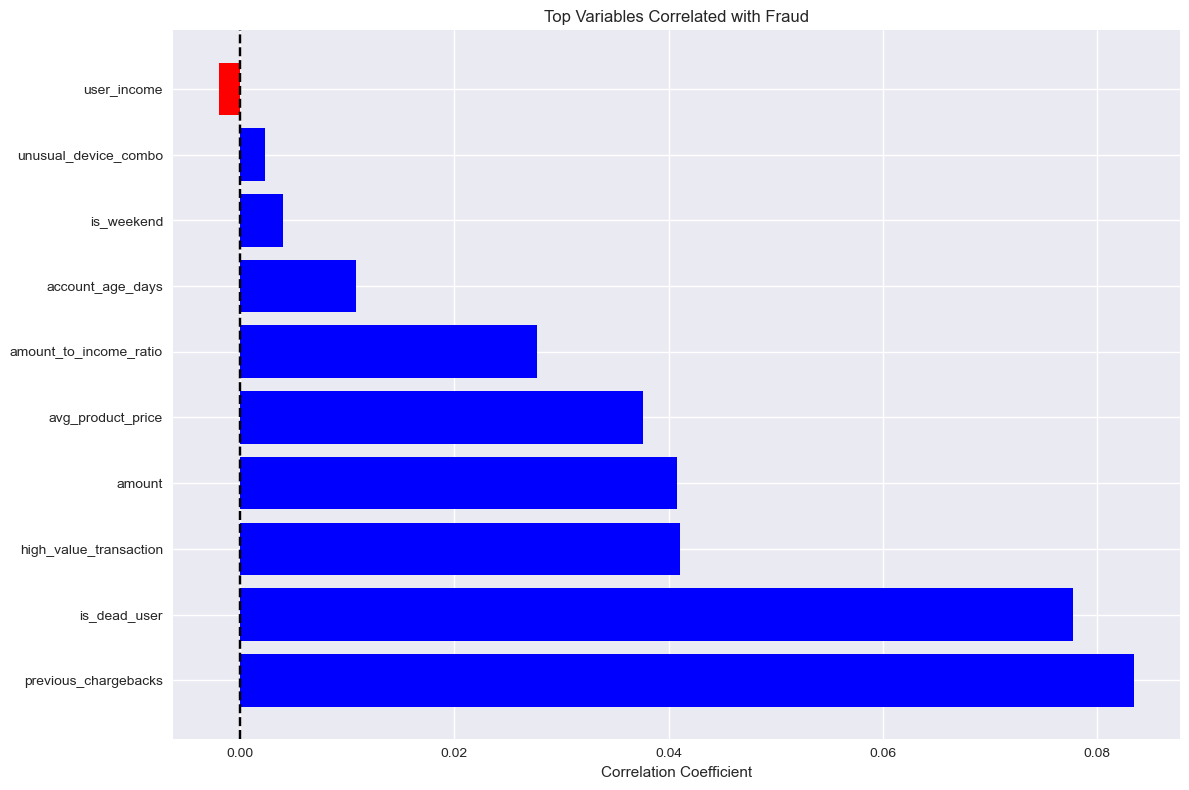

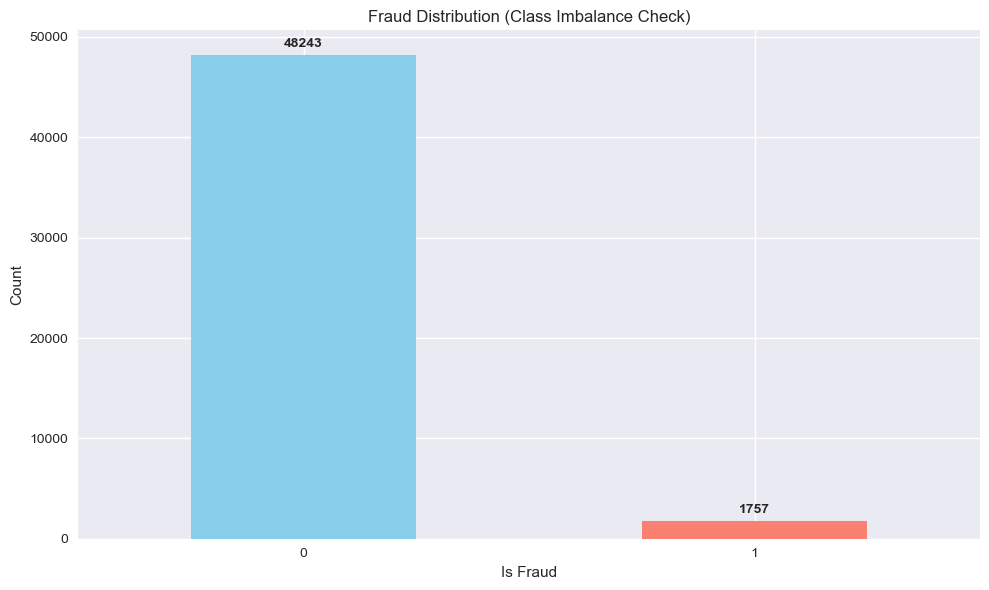

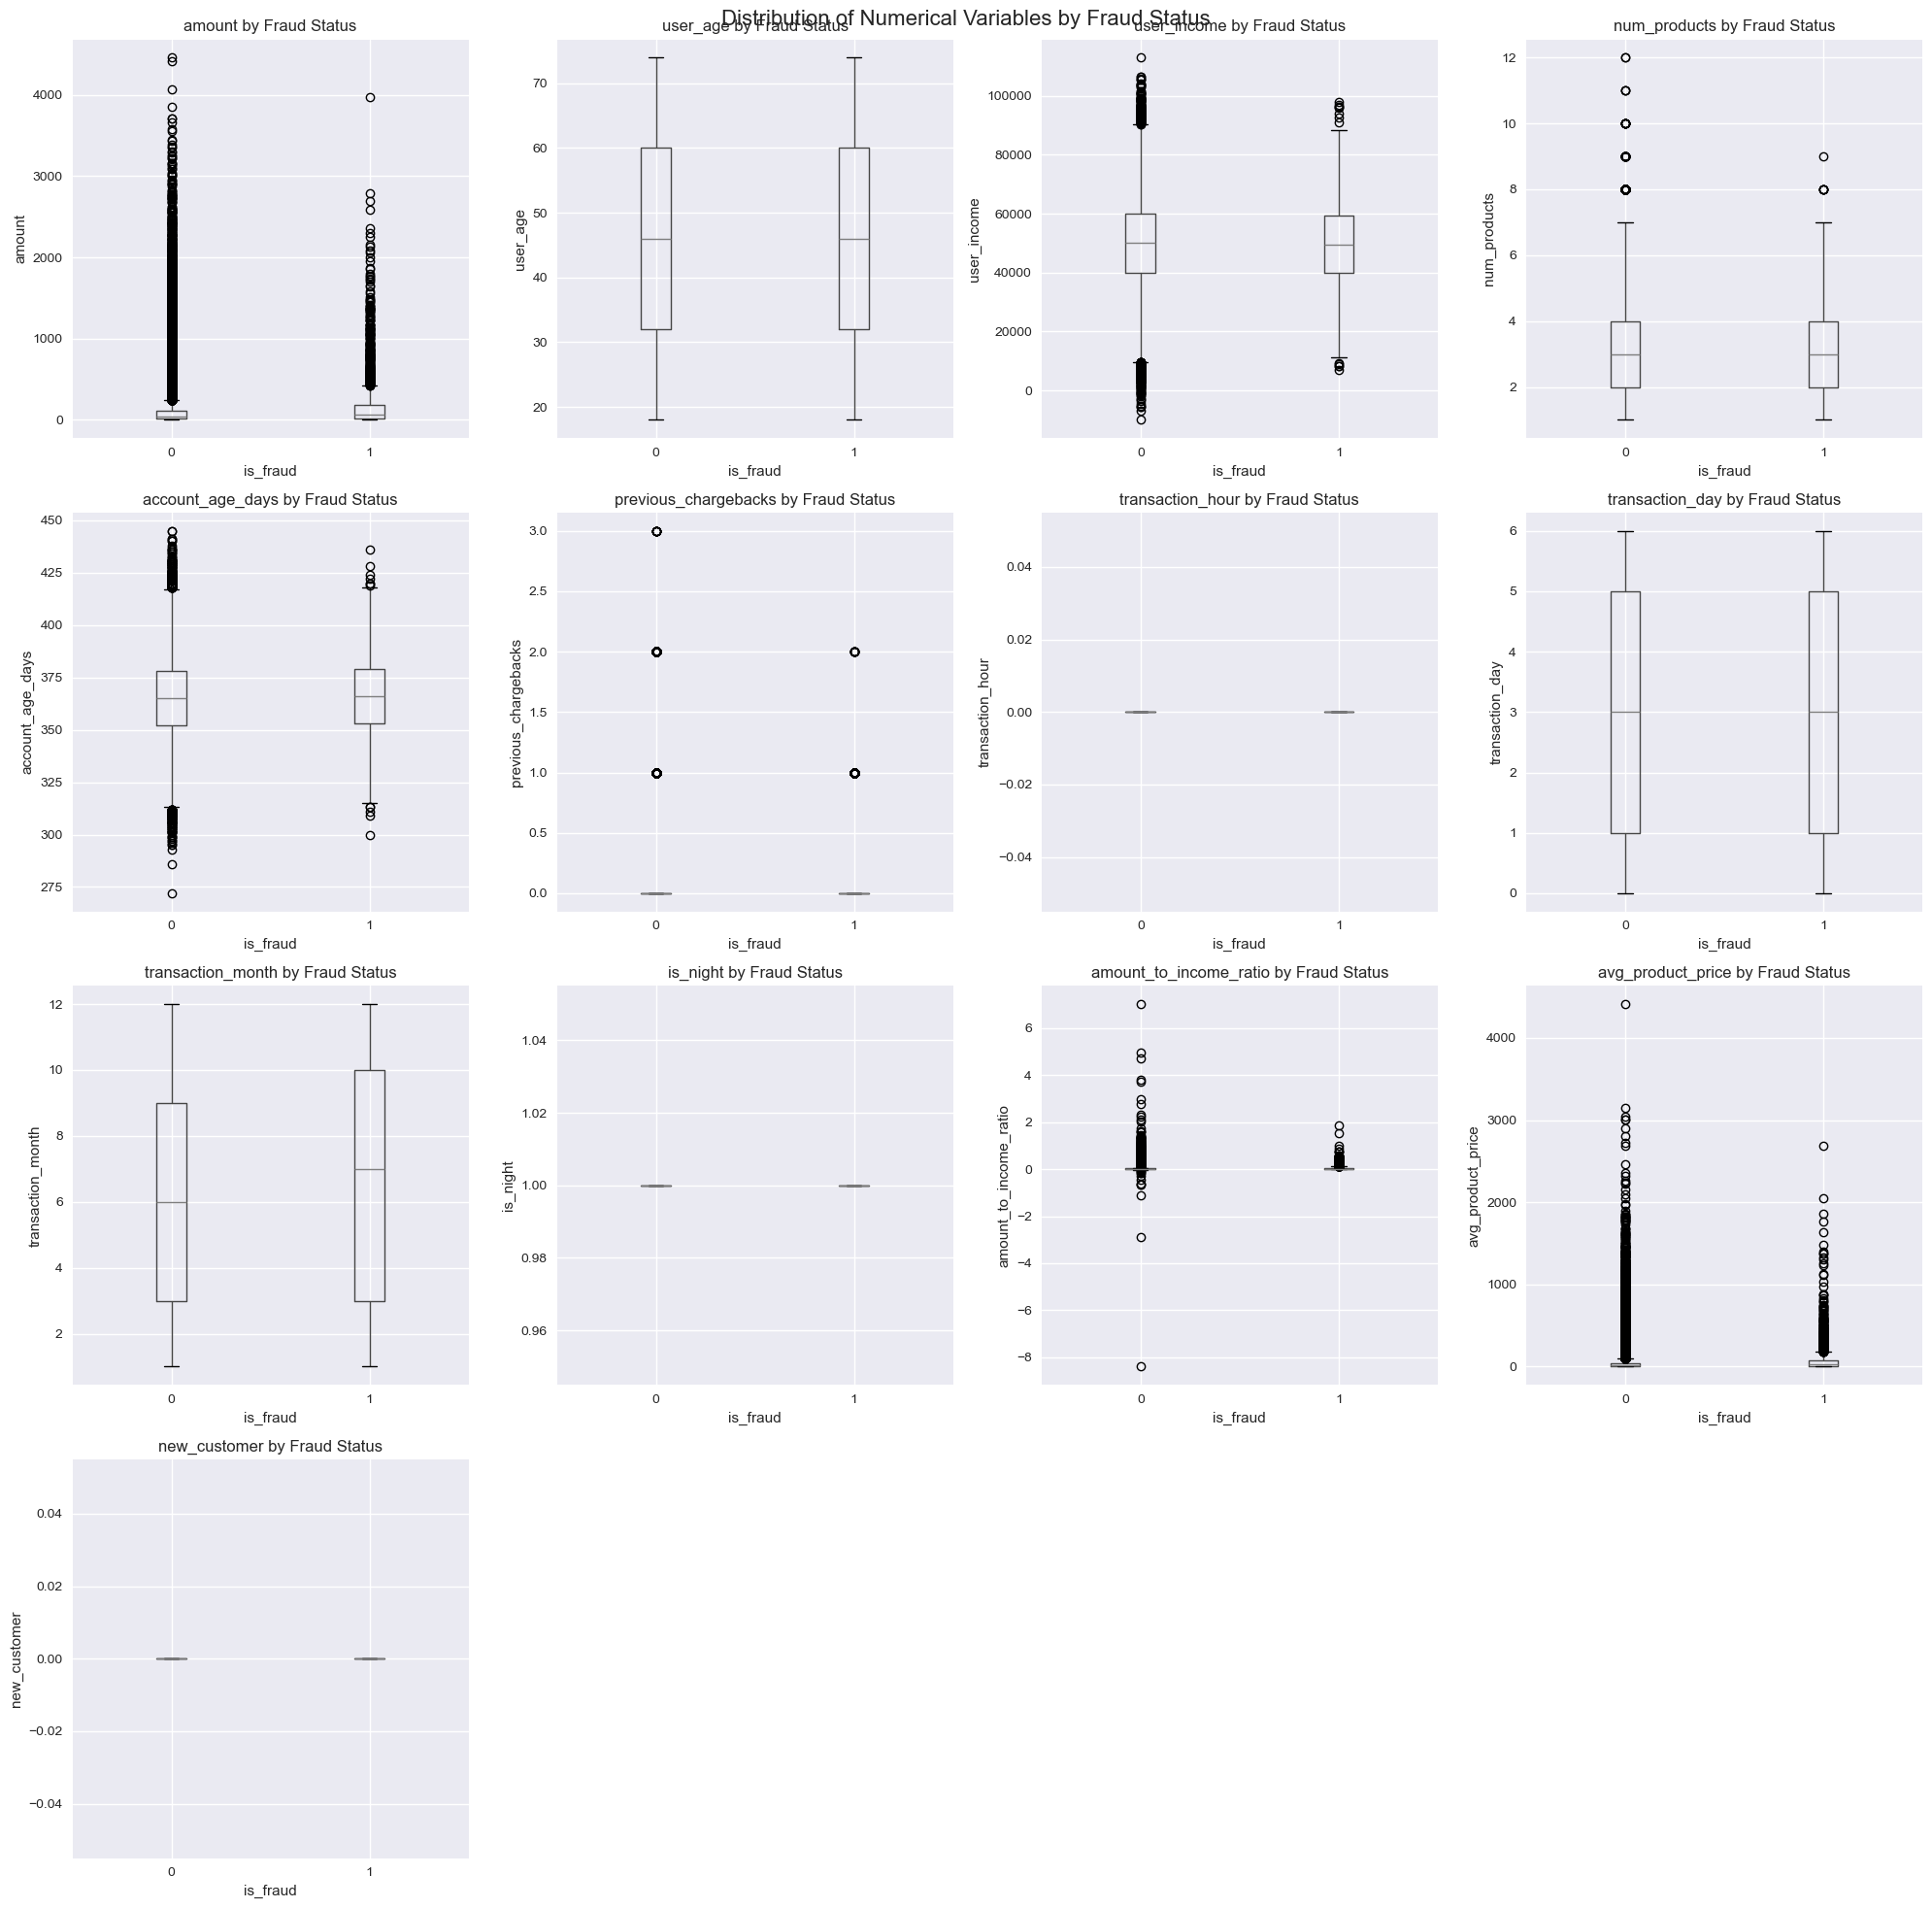

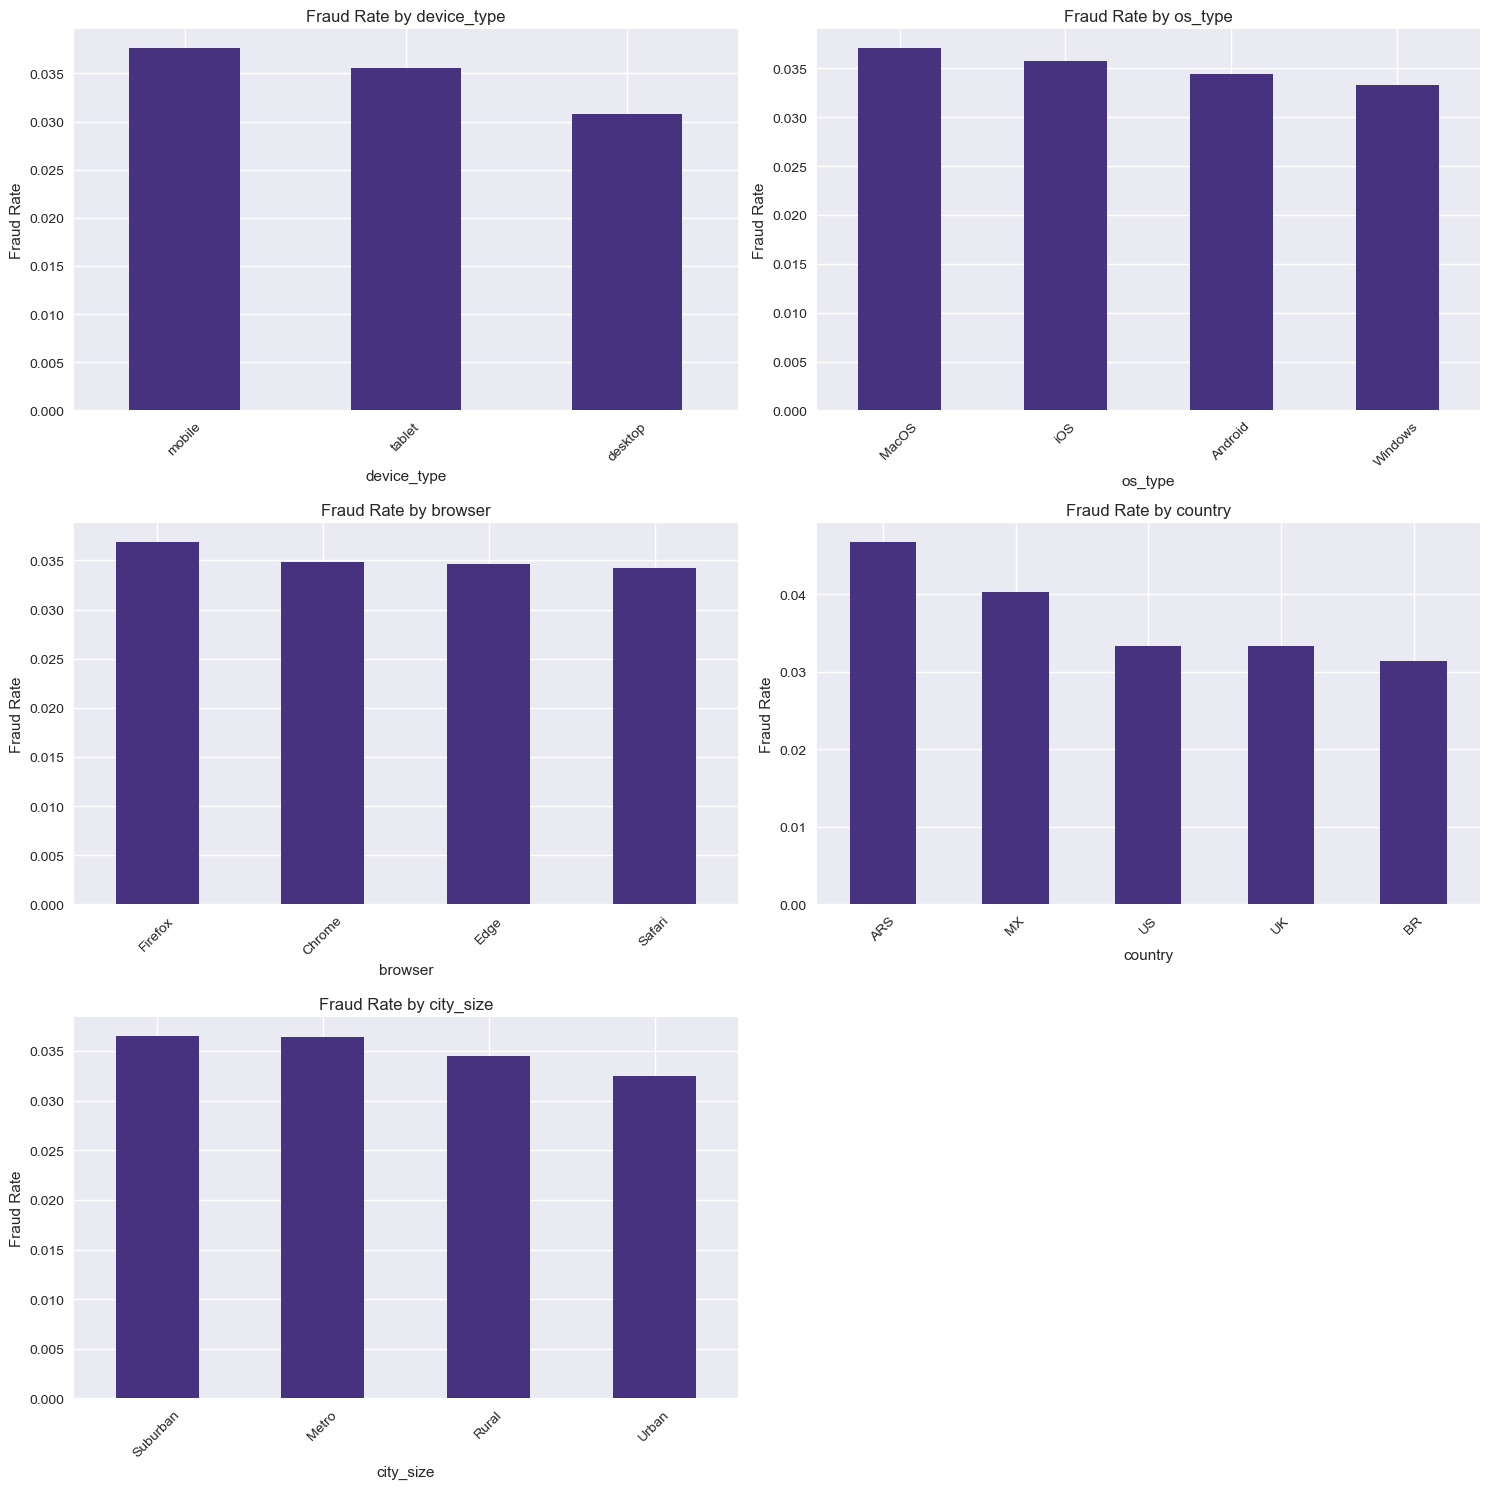

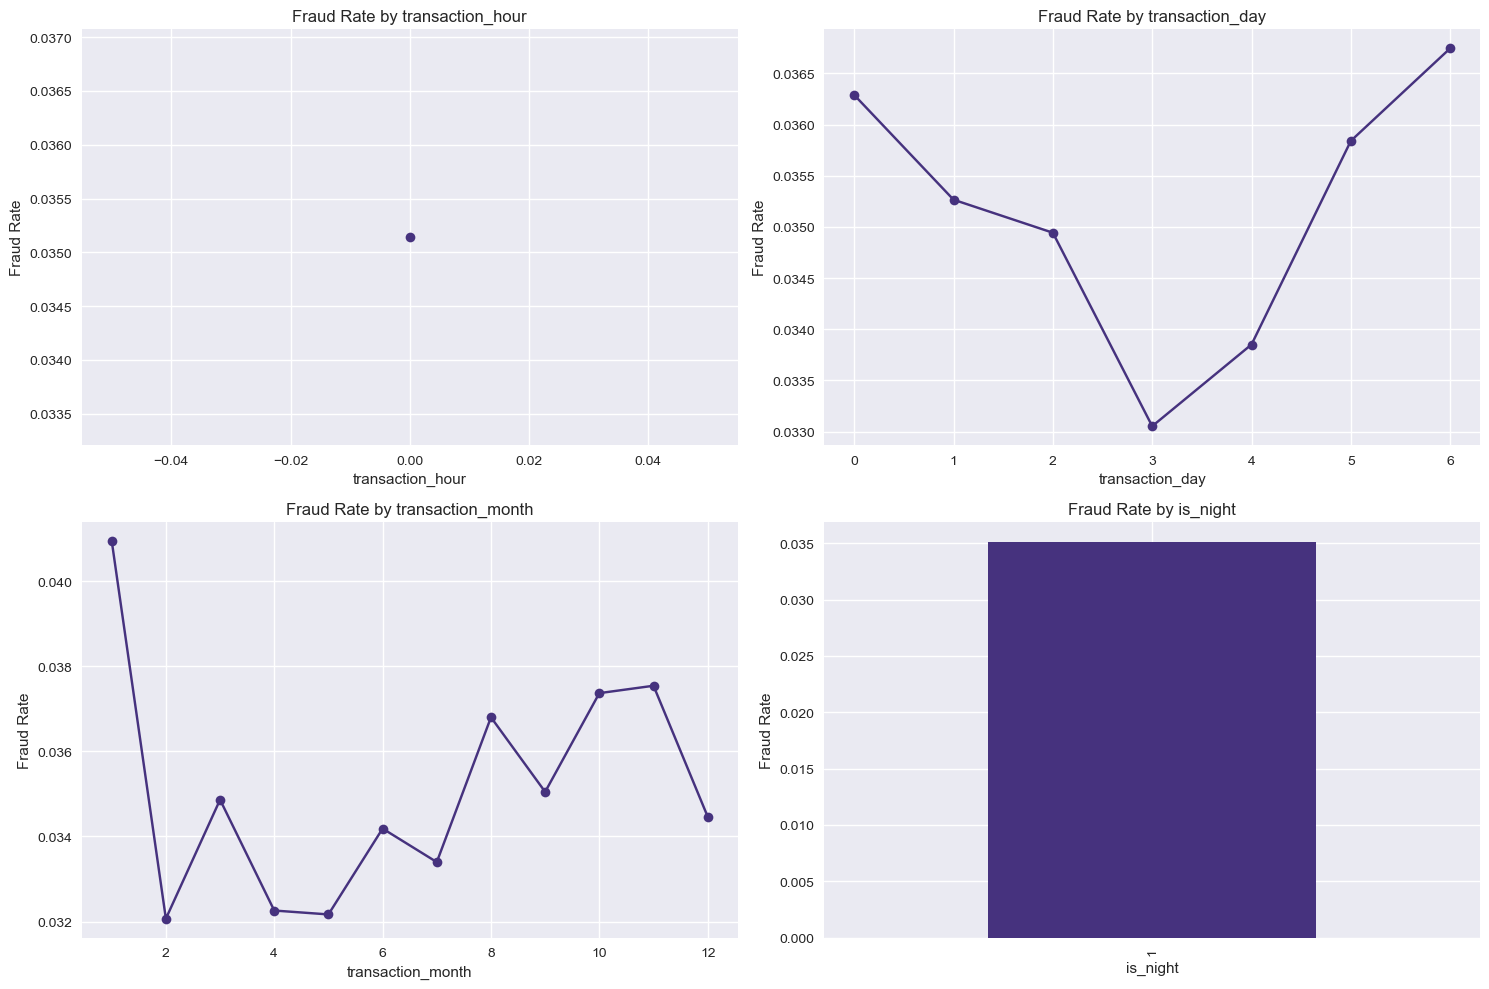

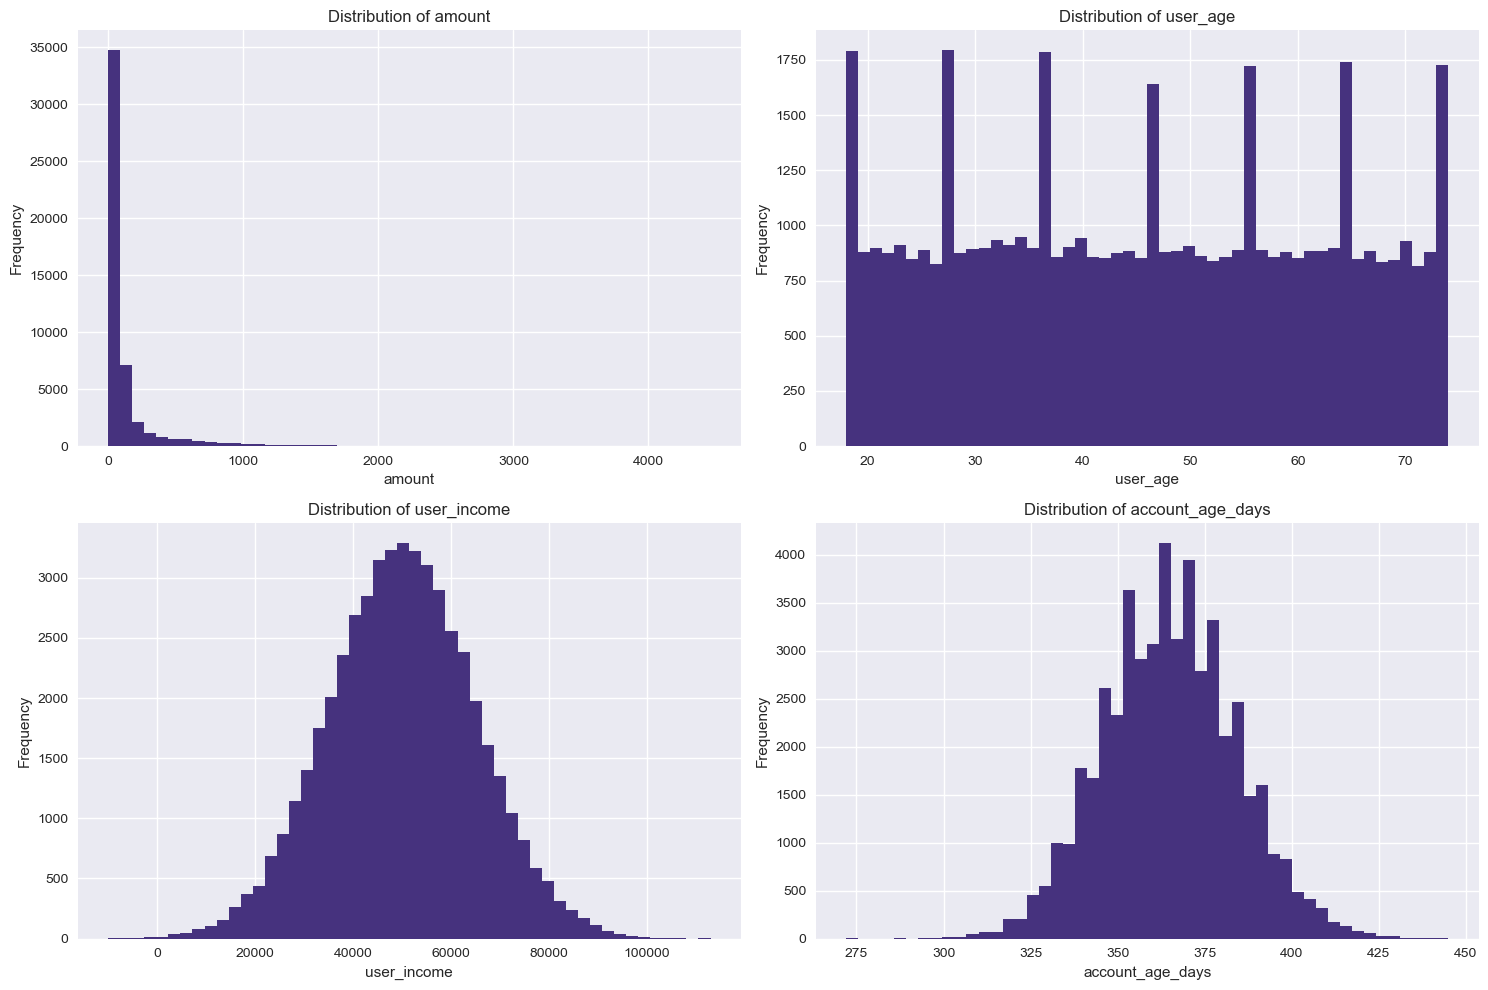

All plots saved to: c:\Users\agust\OneDrive\Documentos\VScode\Fraudes\mlparadetectarfraudes\notebooks\..\reports\figures


In [ ]:
#. TIME-BASED ANALYSIS 
time_vars = ['transaction_hour', 'transaction_day', 'transaction_month', 'is_night']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(time_vars):
    fraud_by_time = data.groupby(col)['is_fraud'].mean()
    
    if col != 'is_night':
        # For continuous time variables
        fraud_by_time.plot(kind='line', ax=axes[i], marker='o', linestyle='-')
    else:
        # For binary variable
        fraud_by_time.plot(kind='bar', ax=axes[i])
    
    axes[i].set_title(f'Fraud Rate by {col}')
    axes[i].set_ylabel('Fraud Rate')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.savefig(figures_path / 'fraud_rate_time.png', dpi=300, bbox_inches='tight')
plt.savefig(figures_path / 'fraud_rate_time.pdf', bbox_inches='tight')
plt.show()



### DISTRIBUTION OF KEY VARIABLES

In [ ]:
#. DISTRIBUTION OF KEY VARIABLES
key_vars = ['amount', 'user_age', 'user_income', 'account_age_days']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(key_vars):
    data[var].hist(bins=50, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig(figures_path / 'key_variables_distribution.png', dpi=300, bbox_inches='tight')
plt.savefig(figures_path / 'key_variables_distribution.pdf', bbox_inches='tight')
plt.show()

print(f"All plots saved to: {figures_path.absolute()}")

# Outliers

In [ ]:
# Detection of outlier values using the interquartile range.

stats = data.describe()

for column in data.select_dtypes(include = "number"):
    Q1 = stats[column]['25%']
    Q3 = stats[column]['75%']
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = data.loc[(data[column] < lower_limit) | (data[column] > upper_limit)]
    
    print(f"Column: {column}")
    print(outliers)
    print("------------------------")

# Dashboard

In [32]:
!pip install panel ipywidgets --quiet
!panel extension install--sys precopy --quiet
!pip install jupyter_bokeh


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\agust\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
"panel" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\agust\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
import plotly.express as px
!pip install panel  --quiet
import panel as pn
pn.extension('plotly')



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\agust\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'panel'

transaction_datetime', 'amount', 'user_age', 'user_income',
       'device_type', 'os_type', 'browser', 'country', 'city_size',
       'num_products', 'repeat_customer', 'account_age_days',
       'previous_chargebacks', 'is_dead_user', 'transaction_hour',
       'transaction_day', 'transaction_month', 'is_night', 'is_weekend',
       'is_fraud', 'amount_to_income_ratio', 'avg_product_price',
       'high_value_transaction', 'new_customer', 'unusual_device_combo

In [ ]:
# Armamos dashboard
def dashboard_estrategico():
  #KPIs
  total_amount = data['amount'].sum()
  margen = total_amount * 0.03
  crecimiento = ((data[data['transaction_datetime'].dt.month == 12]['amount'].sum() -
                 data[data['transaction_datetime'].dt.month == 1]['amount'].sum()) /
                 data[data['transaction_datetime'].dt.month == 1]['amount'].sum()) * 100

# Gráficos
  fig1 = px.line(data.groupby(data['transaction_datetime'].dt.month)['amount'].sum().reset_index(), x='transaction_datetime', y='amount', title='amount mensuales')
  fig2 = px.treemap(data, path=['country','city_size'], values='amount', title='amount por País/Tamaño de población')

#Layout
  return pn.Column(
    pn.Row(
        pn.indicators.Number(value=total_amount, name='amount Totales', format='${value:,.0f}'),
        pn.indicators.Number(value=margen, name='Margen Bruto', format='${value:,.0f}'),
        pn.indicators.Number(value=crecimiento, name='Crecimiento Anual', format='{value:,.1f}%')
    ),
    pn.Row(fig1, fig2)
).servable()

dashboard_estrategico()

In [ ]:
#Dashboard analitico
country_widget = pn.widgets.Select(options=data['country'].unique().tolist(), name='País:')
producto_widget = pn.widgets.Select(options=data['city_size'].unique().tolist(), name='Tamaño de población')

@pn.depends(country_widget.param.value, producto_widget.param.value)
def update_analitico(country, producto):
  filtered_data = data[(data['country'] == country) & (data['Producto'] == producto)]

  fig1 = px.line(filtered_data, x='transaction_datetime', y='amount',  #filtered_data.groupby(data['Fecha'].dt.month)['Transacciones'].sum().reset_index()
                 title=f'Transacciones de {producto} en {country}')
  fig2 = px.scatter(filtered_data, x='Clientes',
                    y='amount', trendline='ols', title='Relación Clientes vs Transacciones')
  return pn.Column(
      pn.Row(fig1, fig2),
      pn.pane.DataFrame(filtered_data.sort_values(by='transaction_datetime', ascending=False), width=800)
  )

pn.Column(
    pn.Row(country_widget, producto_widget),
    update_analitico
).servable()

In [ ]:
# Reemplaza 'ruta_del_archivo.csv' con la ubicación y nombre de archivo deseados
ruta_del_archivo_csv = 'data_final.csv'

# Exportar el DataFrame a un archivo CSV
data.to_csv(ruta_del_archivo_csv, index=False)

# Imprimir un mensaje de confirmación
print(f"DataFrame exportado exitosamente a '{ruta_del_archivo_csv}' en formato CSV.")


None


In [ ]:
import os

os.makedirs(output_dir, exist_ok=True)
input_dir = path.data_raw_dir()
output_dir = path.data_processed_dir()
(
    vaccination_country_cumulative_df
    .to_csv(
        path_or_buf=output_dir.joinpath("vaccination_country_cumulative.csv"),
        index=False
    )
)